# Exploration of NYC Taxi Data
by Daniel, David, Geraldine, Kharmalina, Trisha

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset("taxis")

## What can we learn about taxis in NYC?

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<Axes: >

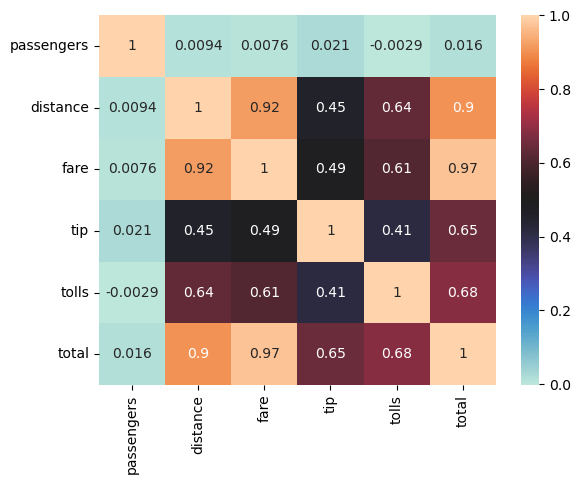

In [60]:
correlation=df.corr(numeric_only = True)
sns.heatmap(data=correlation, cmap='icefire', annot=True)

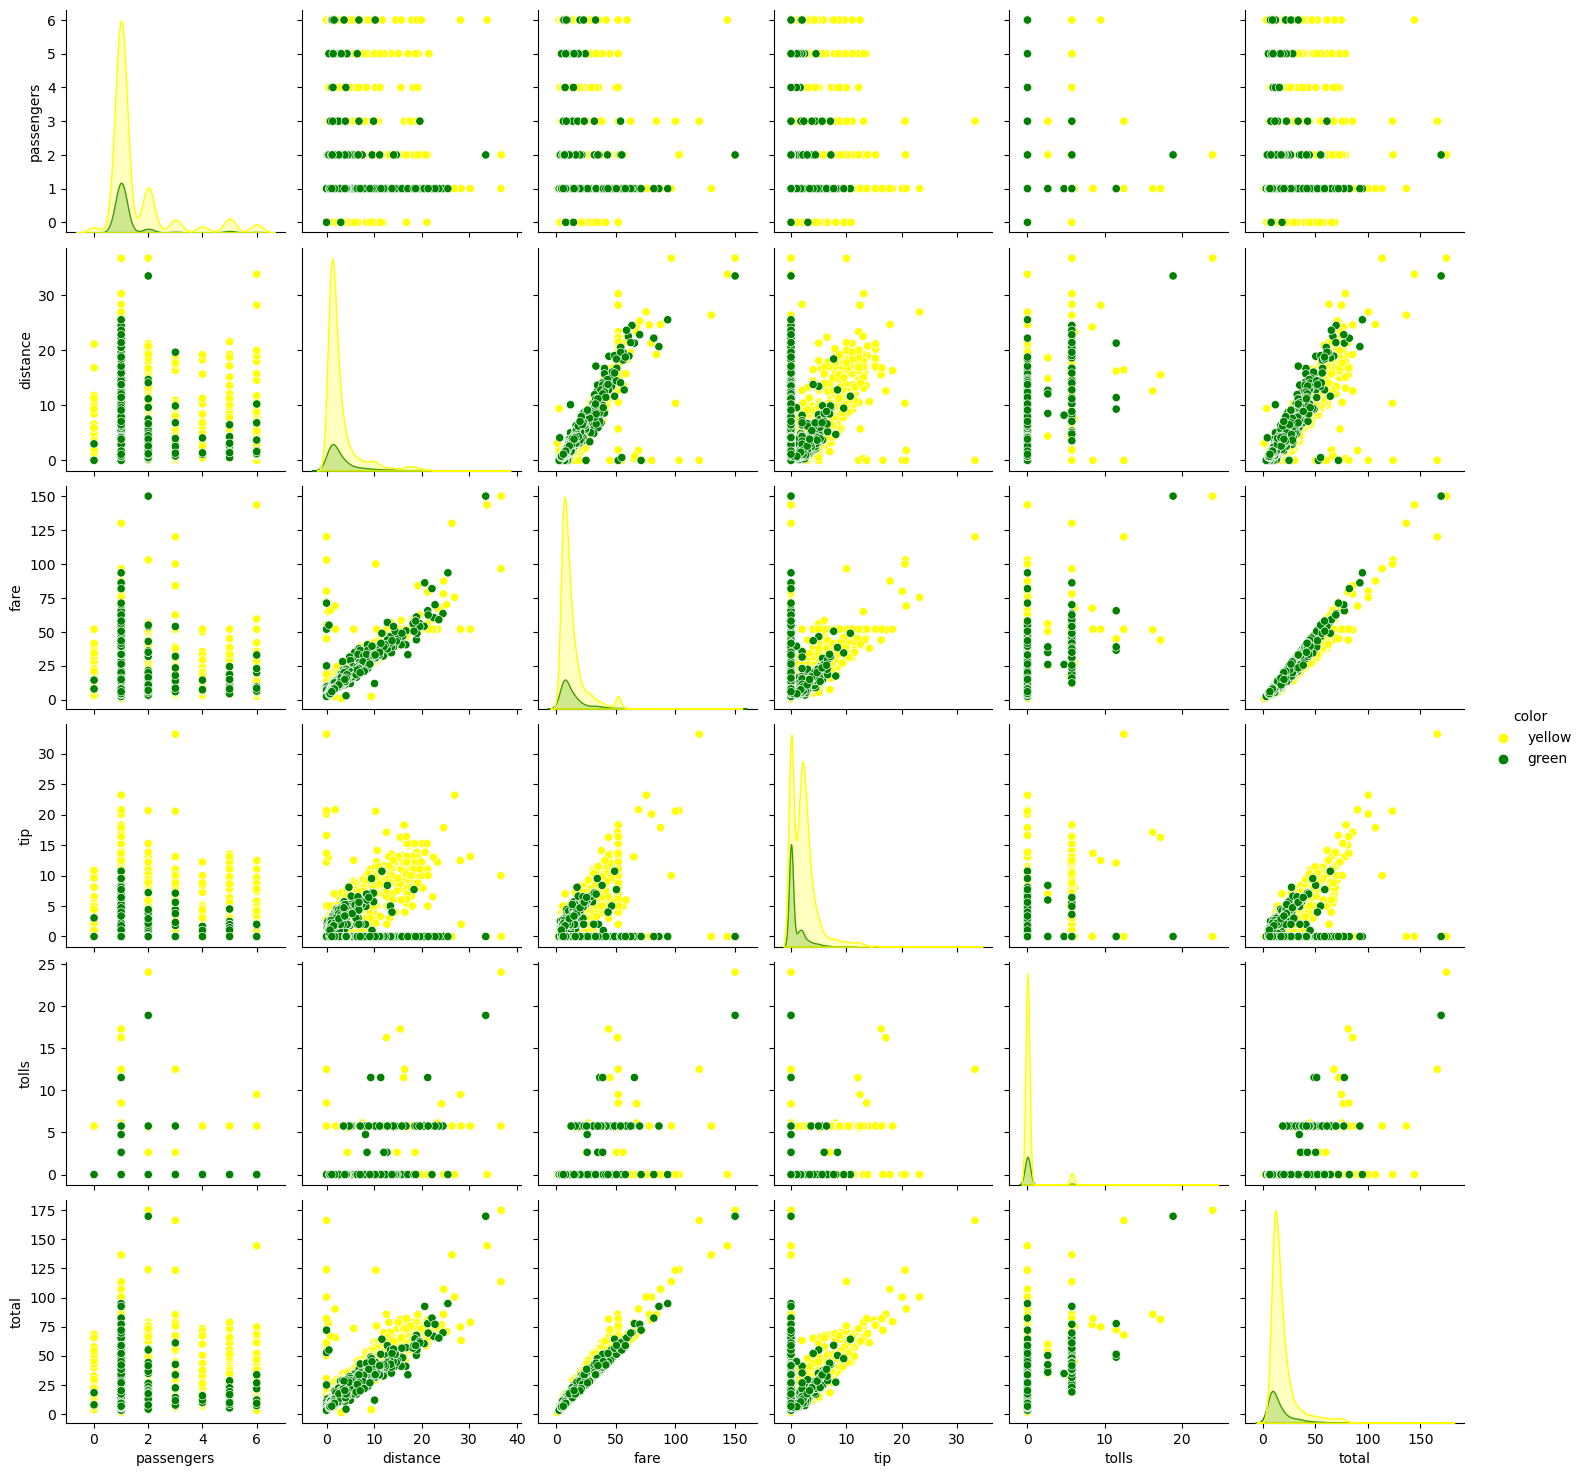

In [40]:
sns.pairplot(data=df, hue='color', palette=['yellow', 'green'])

## Does the time of year have an effect? 

In [23]:
totalpermonth = pd.pivot_table(data = df, values = "total", index = df["dropoff"].dt.month_name(), 
                                  aggfunc =  'sum')
# Define a custom sorting order for the 'City' column
custom_sort_order = ['February', 'March', 'April']

In [24]:
# Order the DataFrame by the 'dropoff' column using the custom sorting order
df_sorted_by_city_custom_order = totalpermonth.sort_values(by='dropoff', key=lambda x: x.map({v: i for i, v in enumerate(custom_sort_order)}))

Text(0.5, 1.0, 'Total Amount per Month')

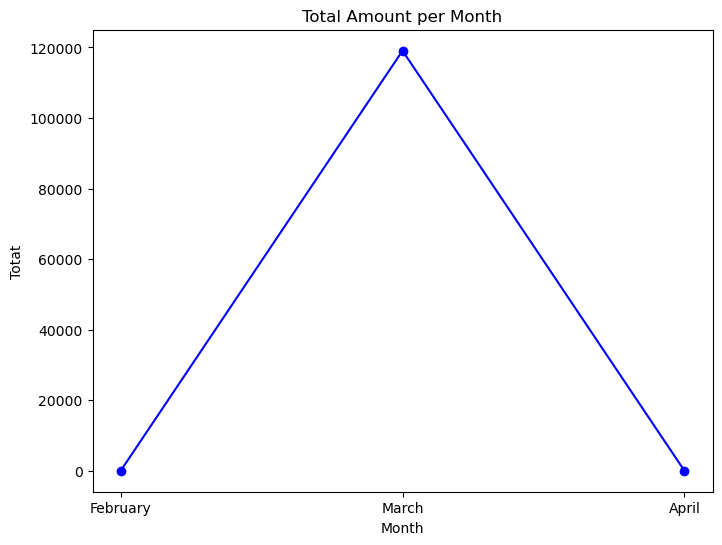

In [27]:
# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(df_sorted_by_city_custom_order.index, df_sorted_by_city_custom_order, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Totat')
plt.title('Total Amount per Month')

<Axes: >

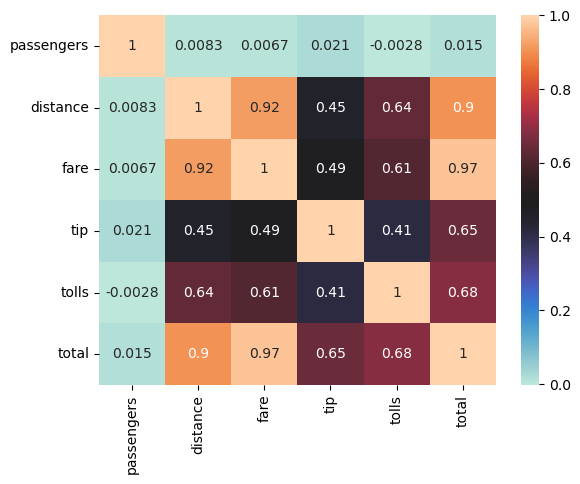

In [31]:
sns.heatmap(data=march_correlation, cmap='icefire', annot=True)

In [28]:
march_data = df[df["dropoff"].dt.month == 3]
march_correlation=march_data.corr(numeric_only = True)
march_correlation

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.008305,0.006670,0.021421,-0.002818,0.014939
distance,0.008305,1.000000,0.920051,0.453083,0.635641,0.904664
fare,0.006670,0.920051,1.000000,0.489016,0.609587,0.974360
tip,0.021421,0.453083,0.489016,1.000000,0.413606,0.646513
tolls,-0.002818,0.635641,0.609587,0.413606,1.000000,0.683354
total,0.014939,0.904664,0.974360,0.646513,0.683354,1.000000


## Let's focus on tips:
Which color cabs get more tips?

[Text(0.5, 1.0, 'Average Tip by Cab Color')]

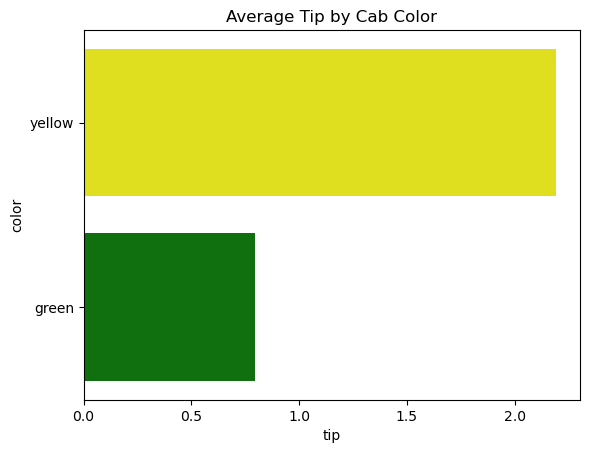

In [55]:
sns.barplot(data=df, x='tip', y='color', palette=['yellow', 'green'], errorbar=None).set(title="Average Tip by Cab Color")

### Longer trips cost more, and should result in higher tips, right?

Text(0.5, 0.98, 'Distance vs Tip')

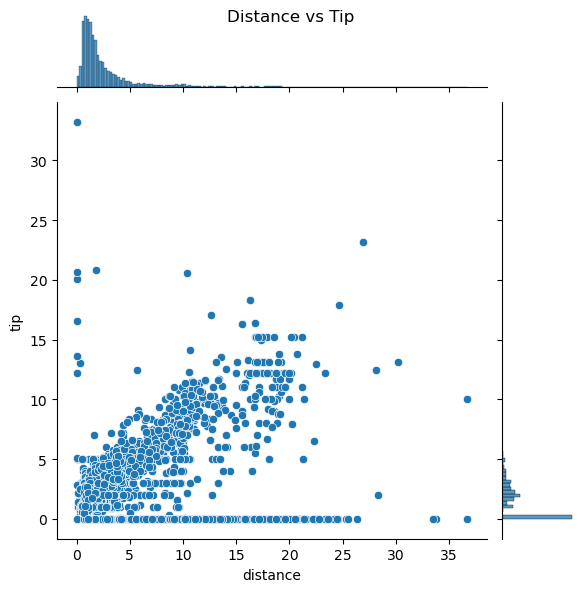

In [57]:
sns.jointplot(data=df, x='distance', y='tip')
plt.suptitle("Distance vs Tip")

### What about the method of payment?

In [13]:
df_mod = df
df_mod['payment'] = df['payment'].fillna(value = 'other')

[Text(0.5, 1.0, 'Tip modes of passengers')]

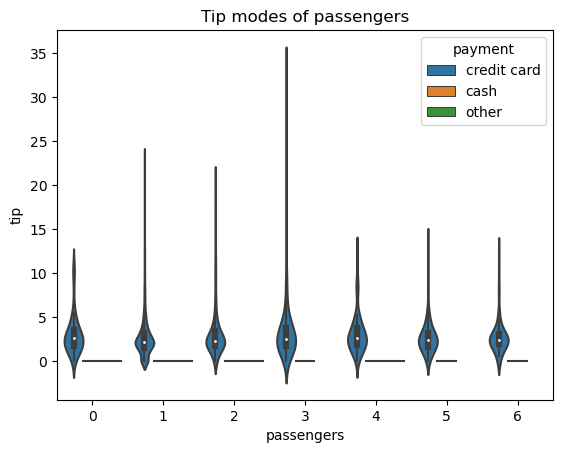

In [34]:
sns.violinplot(data = df_mod, x = 'passengers', y = 'tip', hue='payment', cmap='icefire').set(title='Tip modes of passengers')

### Really? No tips given in cash? Something is fishy...

### What about location in the city? Does that affect the tips?

In [17]:
import pandas as pd

In [18]:
tips_borough = df.groupby(['pickup_borough'])['tip'].mean().reset_index()
tips_borough=pd.DataFrame(tips_borough)
tips_borough

,pickup_borough,tip
0,Bronx,0.148586
1,Brooklyn,0.966345
2,Manhattan,1.939550
3,Queens,3.040061


[Text(0.5, 1.0, 'Average Tip by Borough'),
 Text(0.5, 0, 'Borough'),
 Text(0, 0.5, 'Tip ($)')]

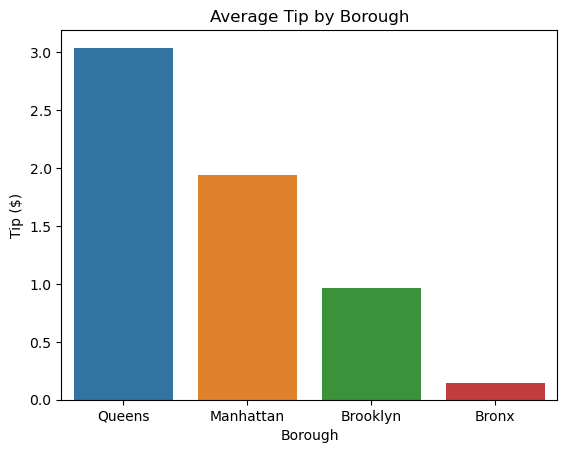

In [19]:
tips_borough_sorted = tips_borough.sort_values(by='tip', ascending= False) 

tips_borough_sorted
sns.barplot(data=tips_borough_sorted, x='pickup_borough', y='tip', errorbar=None).set(title = 'Average Tip by Borough', xlabel = 'Borough', ylabel = 'Tip ($)')

In [20]:
tips_borough2 = df.groupby(['pickup_borough'])['tip'].median().reset_index()
tips_borough2=pd.DataFrame(tips_borough2)
tips_borough2

,pickup_borough,tip
0,Bronx,0.00
1,Brooklyn,0.00
2,Manhattan,1.86
3,Queens,0.00


[Text(0.5, 1.0, 'Median Tip by Borough')]

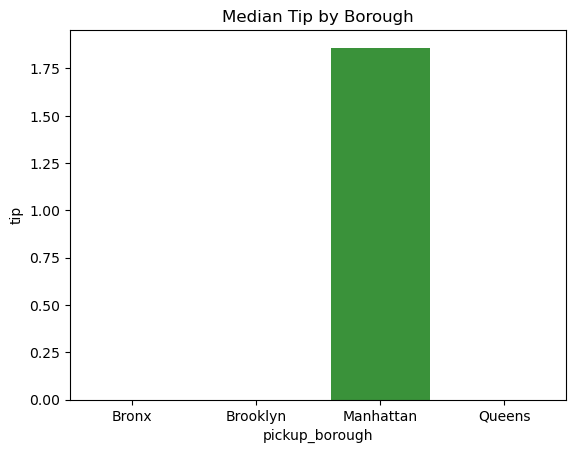

In [53]:
sns.barplot(data=tips_borough2, x='pickup_borough', y='tip', errorbar=None).set(title="Median Tip by Borough")

### Let's just look at those trips paid for with a credit card

In [26]:
import matplotlib.pyplot as plt

In [42]:
cd=df[df['payment']=='credit card']

Text(0.5, 0.98, 'Distance vs Tip by Number of Passengers - Credit Cards Only')

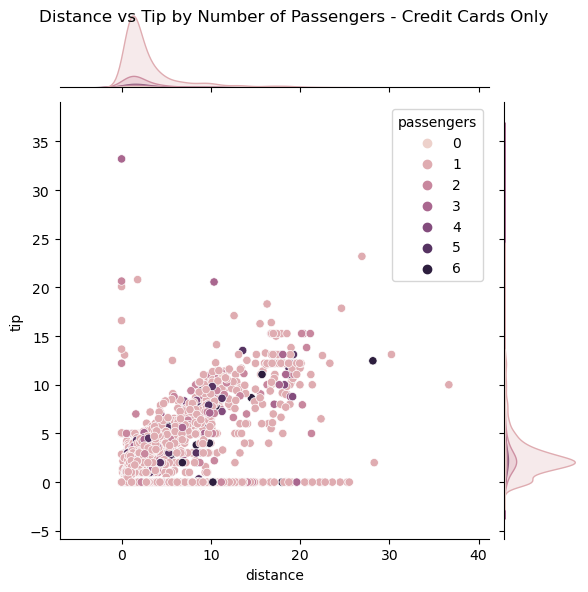

In [58]:
sns.jointplot(data=cd, x='distance', y='tip', hue='passengers')
plt.suptitle("Distance vs Tip by Number of Passengers - Credit Cards Only")

[Text(0.5, 1.0, 'Distribution of Tips by Number of Passengers - Credit Cards Only')]

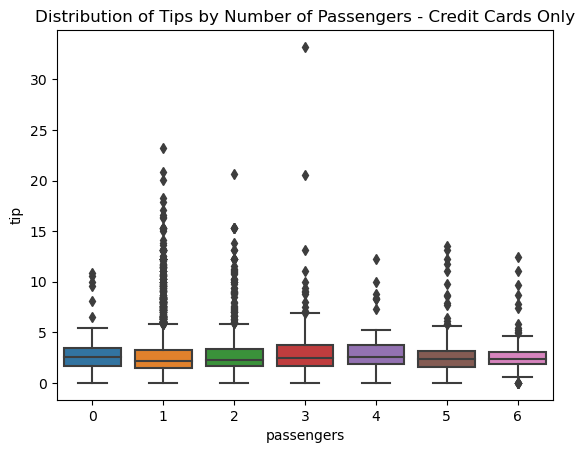

In [59]:
sns.boxplot(data=cd, x='passengers', y='tip').set(title="Distribution of Tips by Number of Passengers - Credit Cards Only")

## So who is more likely to tip their taxi driver?

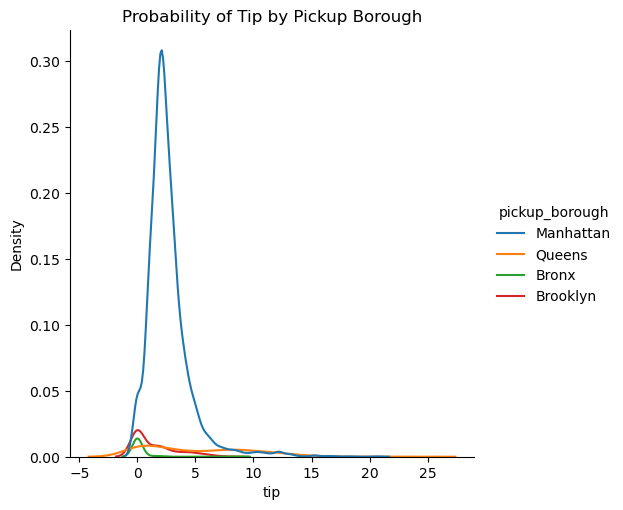

In [50]:
sns.displot(data=cd, x='tip', kind='kde', hue='pickup_borough').set(title="Probability of Tip by Pickup Borough")

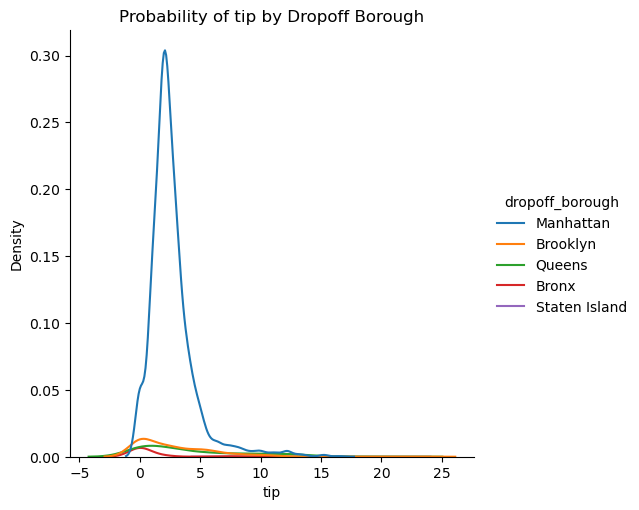

In [49]:
sns.displot(data=cd, x='tip', kind='kde', hue='dropoff_borough').set(title="Probability of tip by Dropoff Borough")

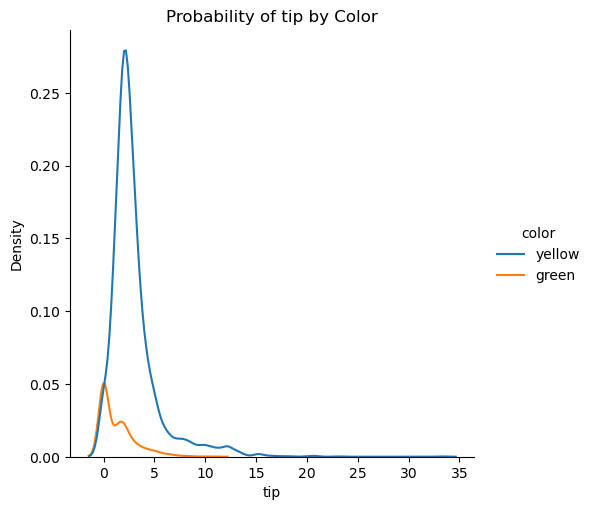

In [48]:
sns.displot(data=cd, x='tip', kind='kde', hue='color').set(title="Probability of tip by Color")